# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [356]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import library to split data into train and test sets
from sklearn.model_selection import train_test_split

# import library to build regression model
from sklearn.linear_model import LinearRegression

# import library to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# import library for linerar regression model
import statsmodels.api as sm

# import library to compute variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [357]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# read the data set
data = pd.read_csv('/content/drive/MyDrive/Great Learning/Supervised Learning/Project 3/used_device_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [358]:
# return the first 5 rows
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [359]:
# return the number of rows and columns
data.shape

(3454, 15)

####Observations
* The data set has 3,454 rows and 15 columns.

In [360]:
# return a summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

####Observations
* There are 2 columns of data type integer, 9 columns of data type float, and 4 columns of data type object (string).


In [361]:
# describe categorical and numerical data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


####Observtions 
* There are 34 brands and 4 operating systems.
* Android is the most popular operating system with 3,214 users.
* 2,335 phones support 4G, while only 152 phones support 5G.
* The average screem size is 13.71 centimeters. 

In [362]:
# check for duplicate values 
data.duplicated().sum()

0

####Observations
* There are no duplicate values in the data set.

In [363]:
# check data for the count of null values (missing values) in each column
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

####Observations
* main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight contain missing values.
* main_camera_mp has the most missing values of 179.

In [364]:
# create a copy of the data so original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. Which attributes are highly correlated with the normalized price of a used device? 
4. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
5. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
6. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
7. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands? 
8. A lot of devices also offer great rear cameras. What is the distribution of devices offering greater than 16MP rear cameras across brands?
9. How has the price of used devices varied over the years?
10. How does the price of used phones vary depending on network?

###Univariate Analysis

In [365]:
# define function to combine a boxplot and histogram into one figure
def histogram_boxplot(data, feature, figsize = (15, 11), kde = False, bins = None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # (2) number of rows of the subplot grid
        sharex = True,  # share x axis among all subplots
        gridspec_kw = {'height_ratios': (0.25, 0.75)},
        figsize = figsize,) 
    
    # draw boxplot with mean
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color= 'pink')
    
    # draw histrogram
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2)
    ax_hist2.axvline(
        data[feature].mean(), color = 'yellow', linestyle='--')  # show mean on histogram
    ax_hist2.axvline(
        data[feature].median(), color = 'black', linestyle="-")  # show median on histogram

### Q1: What does the distribution of normalized used device prices look like?

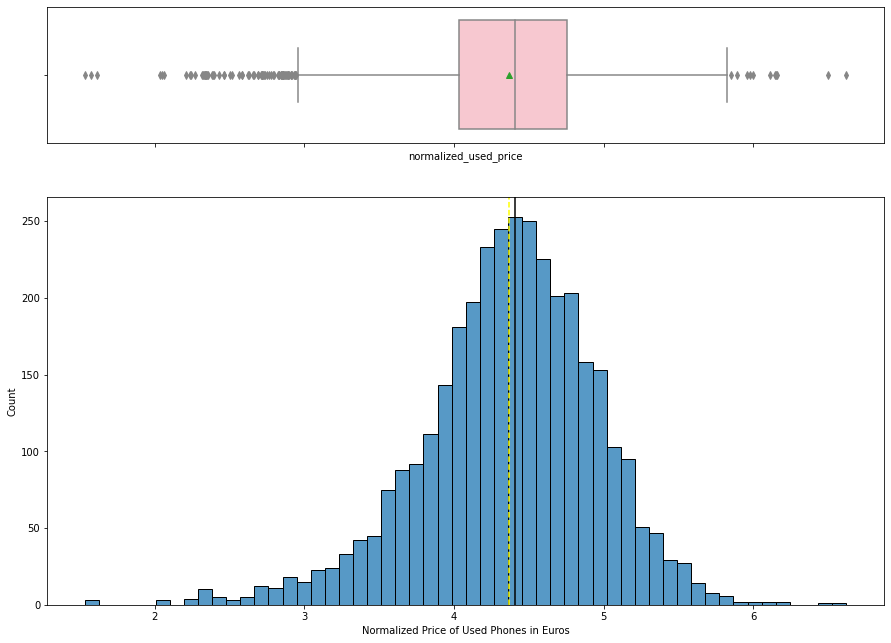

In [366]:
# draw combined histogram and boxplot
histogram_boxplot(df, 'normalized_used_price')

# label x axis
plt.xlabel('Normalized Price of Used Phones in Euros');

####Observations
* Normalized used price is approximately normally distributed.
* There are outliers on boths sides of the normalized used price data set. 

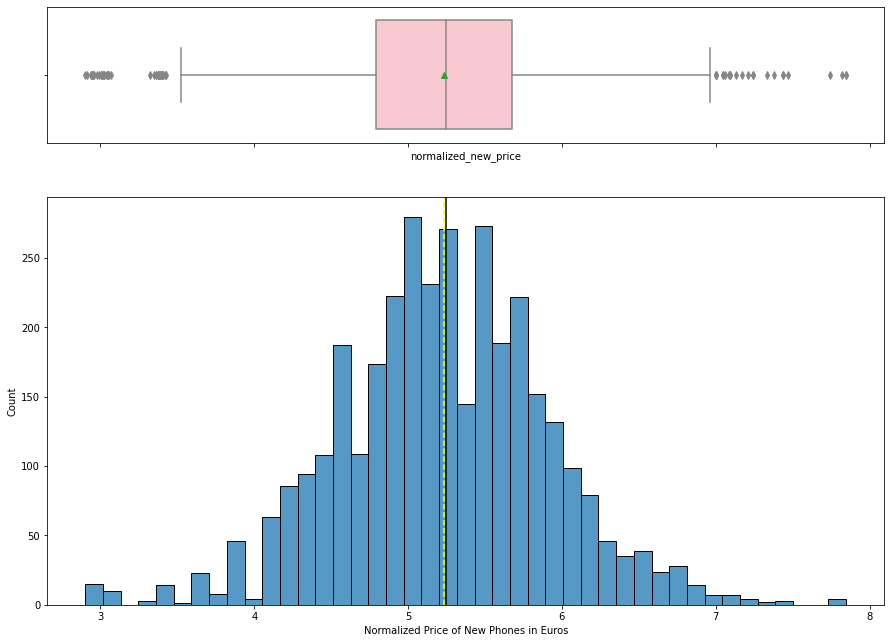

In [367]:
# draw combined histogram and boxplot
histogram_boxplot(df, 'normalized_new_price')

# label x axis
plt.xlabel('Normalized Price of New Phones in Euros');

####Observations
* Normalized new price is approximately normally distributed with outliers on both sides.

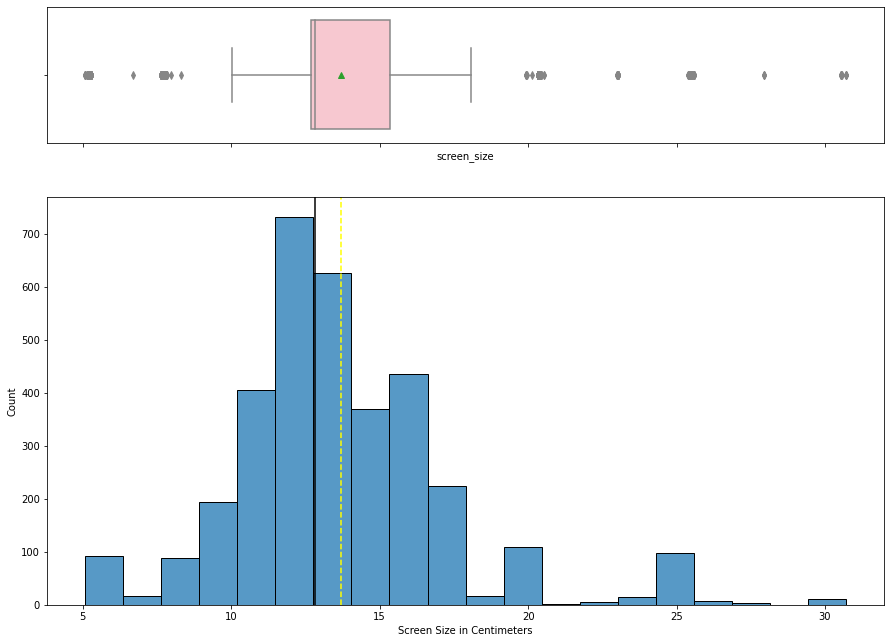

In [368]:
# draw combined histogram and boxplot
histogram_boxplot(df, 'screen_size', bins = 20)

# label x axis
plt.xlabel('Screen Size in Centimeters');

####Observations
* Screen size shows an approximately right-skewed distributed with outliers on both sides of the data set.

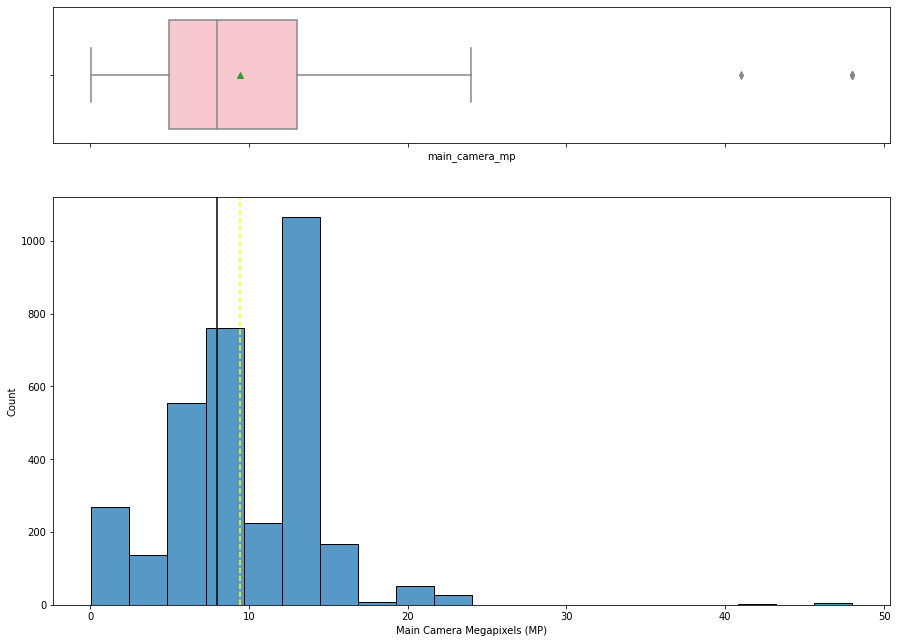

In [369]:
# draw combined histogram and boxplot
histogram_boxplot(df, 'main_camera_mp', bins = 20)

# label x axis
plt.xlabel('Main Camera Megapixels (MP)');

####Observations
* Main camera mega pixels shows a right-skewed distribution. 
* Outliers are present on one side of the data set.

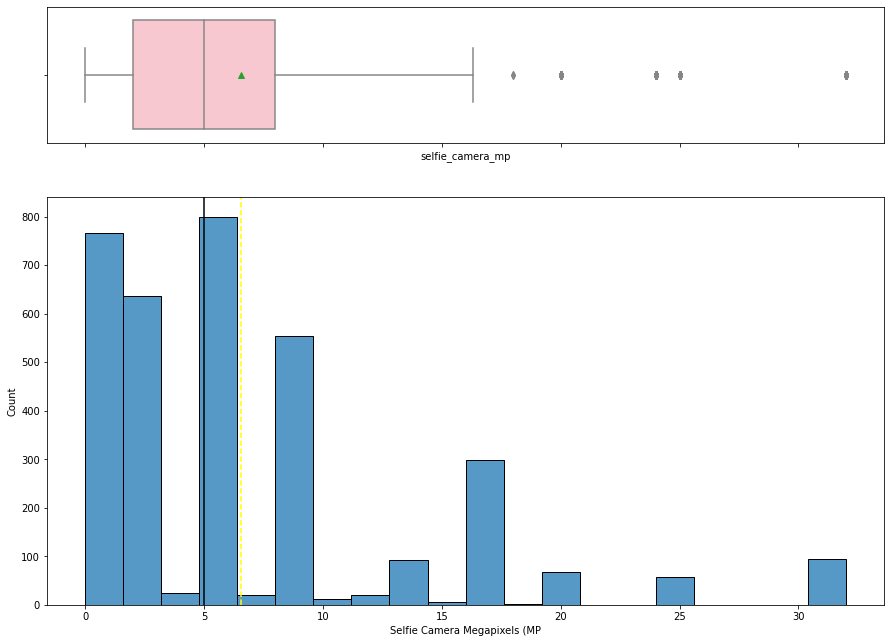

In [370]:
# draw combined histogram and boxplot
histogram_boxplot(df, 'selfie_camera_mp', bins = 20)

# label x axis
plt.xlabel('Selfie Camera Megapixels (MP');

####Observations
* Selfie camera mega pixels shows a right-skewed distribtuion with outliers on one side of the data set.

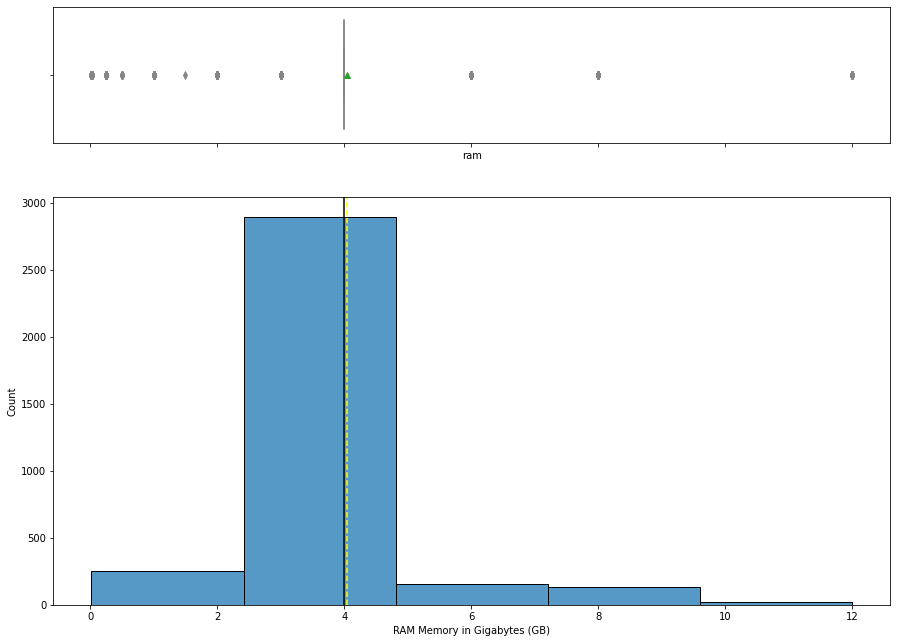

In [371]:
# draw combined histogram and boxplot
histogram_boxplot(df,'ram', bins = 5)

# label x axis
plt.xlabel('RAM Memory in Gigabytes (GB)');

####Observations
* RAM is approximately normally distributed to slightly right-skewed with outliers on both sides.

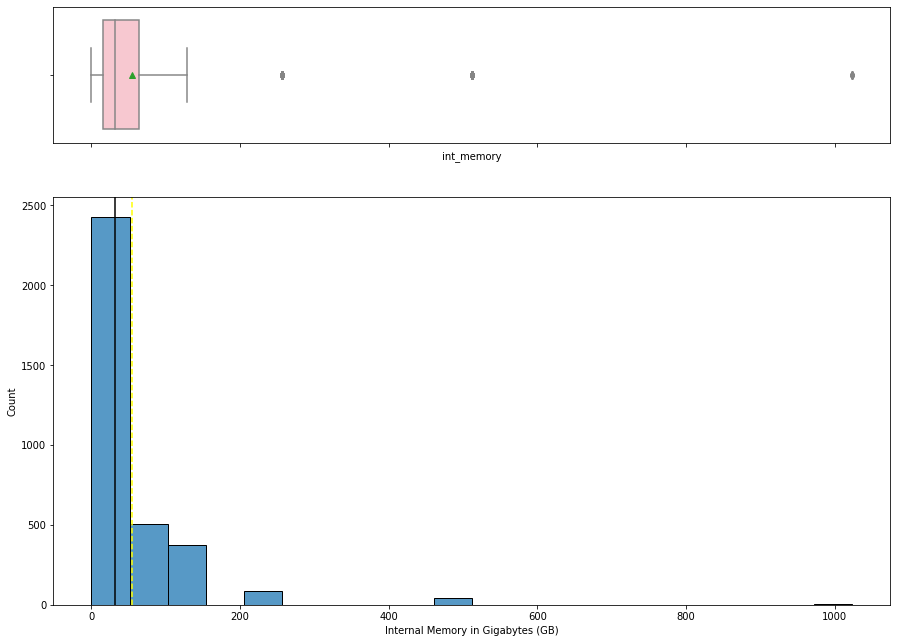

In [372]:
# draw combined histogram and boxplot
histogram_boxplot(df, 'int_memory', bins = 20)

# label x axis
plt.xlabel('Internal Memory in Gigabytes (GB)');

####Observations
* Internal memory has a right-skewed distribution with outliers on one side.

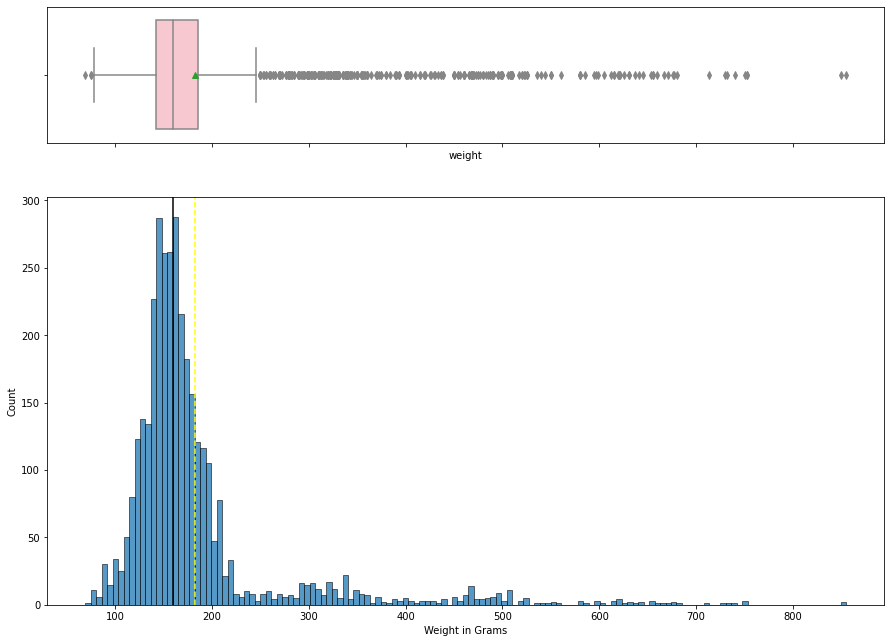

In [373]:
# draw combined histogram and boxplot
histogram_boxplot(df, 'weight')

# label x axis
plt.xlabel('Weight in Grams');

####Observations
* Weight has a right-skewed distribution with outliers on both sides of the data set.

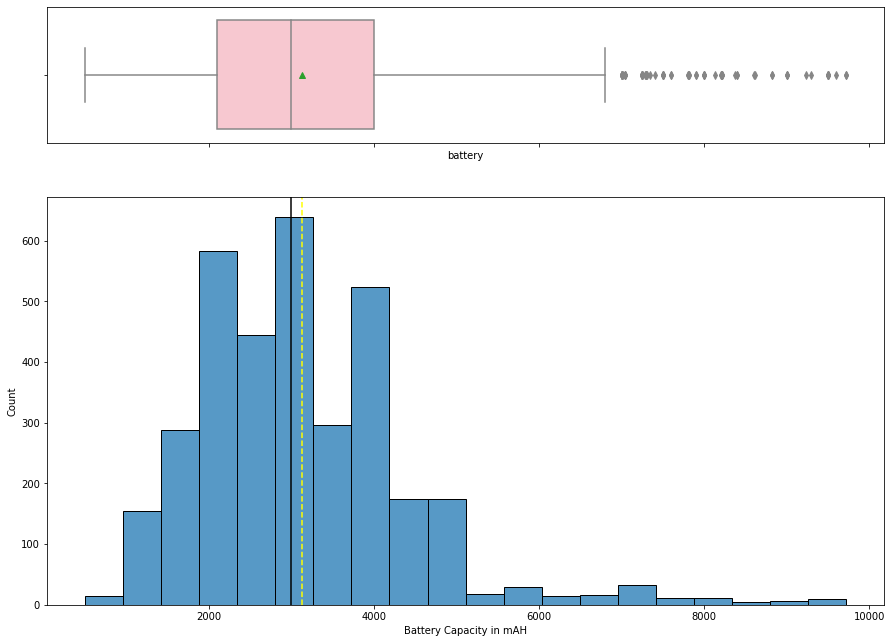

In [374]:
# draw combined histogram and boxplot
histogram_boxplot(df, 'battery', bins = 20)

# label x axis
plt.xlabel('Battery Capacity in mAH');

####Observations
* Battery capacity has a right-skewed distribution with outliers on one side of the data set.

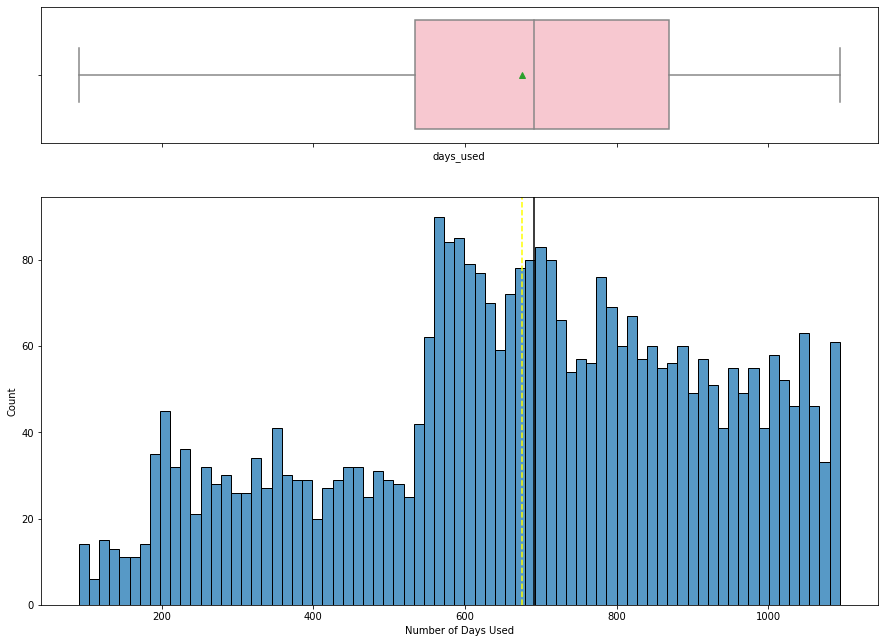

In [375]:
# draw combined histograma and boxplot
histogram_boxplot(df, 'days_used', bins = 75)

# label x axis
plt.xlabel('Number of Days Used');

####Observations
* Days used has a moderately left-skewed distribution with no outliers.

In [376]:
# define function to create labeled barplot
def labeled_barplot(data, feature, perc = False, n = None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 2, 6))
    else:
        plt.figure(figsize = (n + 2, 6))

    # rotate x labels 45 degrees and set font to size 15
    plt.xticks(rotation = 45, fontsize = 15)
    ax = sns.countplot(data = data, x = feature, palette = 'Paired', order = data[feature].value_counts().index[:n],)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y), ha = 'center', va = 'center', size = 12, xytext = (0, 5), textcoords = 'offset points',)  # annotate the percentage

    plt.show()


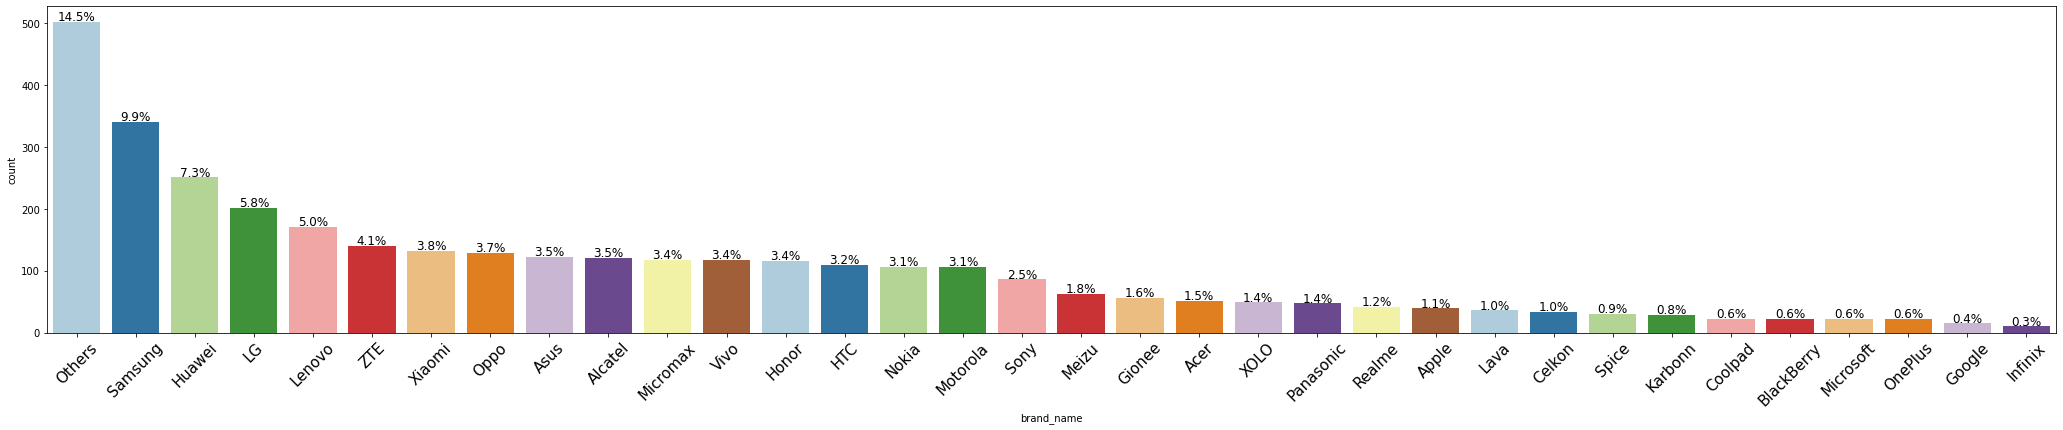

In [377]:
# draw labeled barplot
labeled_barplot(df, 'brand_name', perc = True);

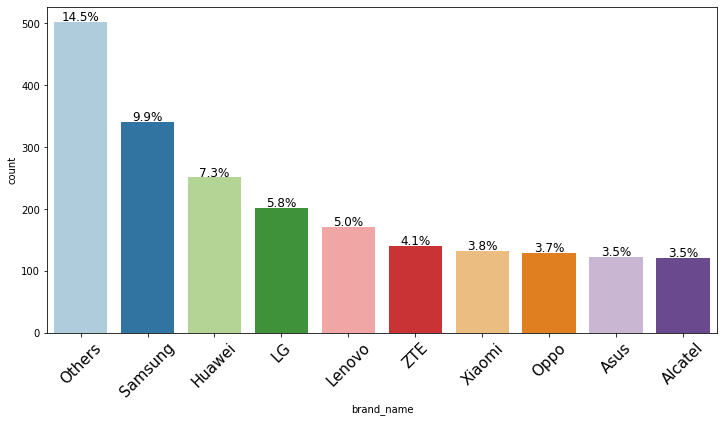

In [378]:
# draw labeled barplot and restrict to top 10 columns
labeled_barplot(df, 'brand_name', perc = True, n = 10);

####Observations
* A lot of brands are classified as others and unknown. 
* Samsung has the most number of phones in the data set. 

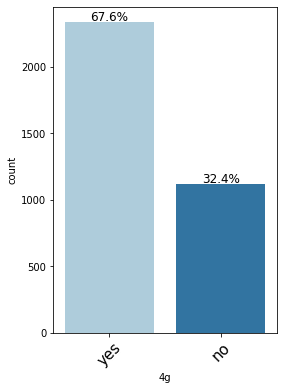

In [379]:
# draw labeled barplot
labeled_barplot(df, '4g', perc = True);

####Observations
* 67.6% of phones in the data set have 4g capability.

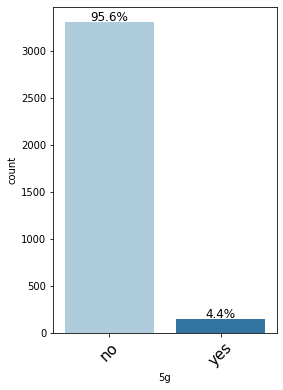

In [380]:
# draw labeled barplot
labeled_barplot(df, '5g', perc = True);

####Observations
* Only 4.4% of phones in the data set have 5G capability.

###Q2: What percentage of the used device market is dominated by Android devices?

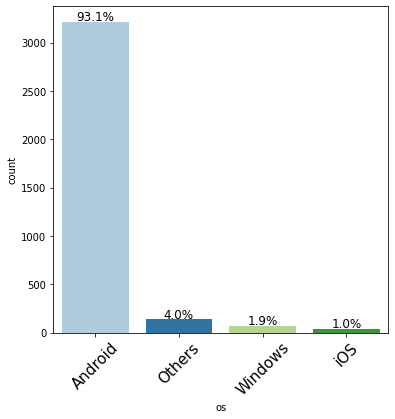

In [381]:
# draw labeled barplot
labeled_barplot(df, 'os', perc = True);

####Observations 
* Android operating systems accounts for 93.1% of used phones in the data set, while iOS only accounts for 1.0%.

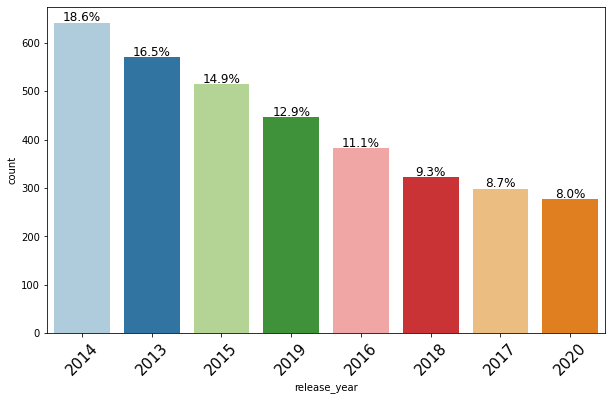

In [382]:
# draw labeled barplot
labeled_barplot(df, 'release_year', perc = True);

####Observations
* 2014 released the most refurbished devices while 2020 released the least number of refurbished devices.

##Bivariate Analysis

###Q3: Which attributes are highly correlated with the normalized price of a used device?

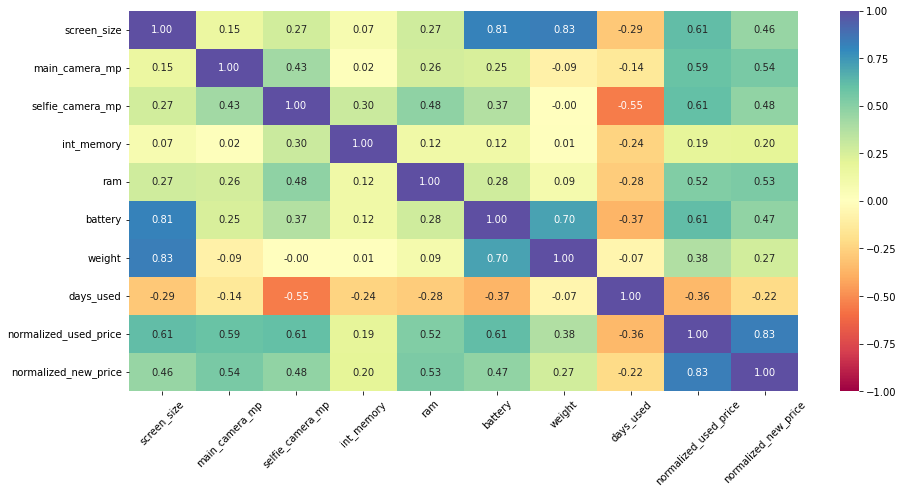

In [383]:
# create list of columns with numeric data types
num_list = df.select_dtypes(include = np.number).columns.tolist()

# removing release_year because year is categorical not numerical
num_list.remove('release_year')

# set figure size
plt.figure(figsize = (15, 7))

# draw heatmap
sns.heatmap(
    df[num_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = '.2f', cmap = 'Spectral');

# rotate x labels 45 degrees and set font size to 10
plt.xticks(rotation = 45, fontsize = 10);


####Observations
* Battery/Weight, Battery/Screen Size, Weight/ Screen Size, and Normalized Used Price/ Normalized New Price have strong correlations. 
* There is a slightly negative correlation between Days Used and Selfie Camera MP.

###Q4: The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

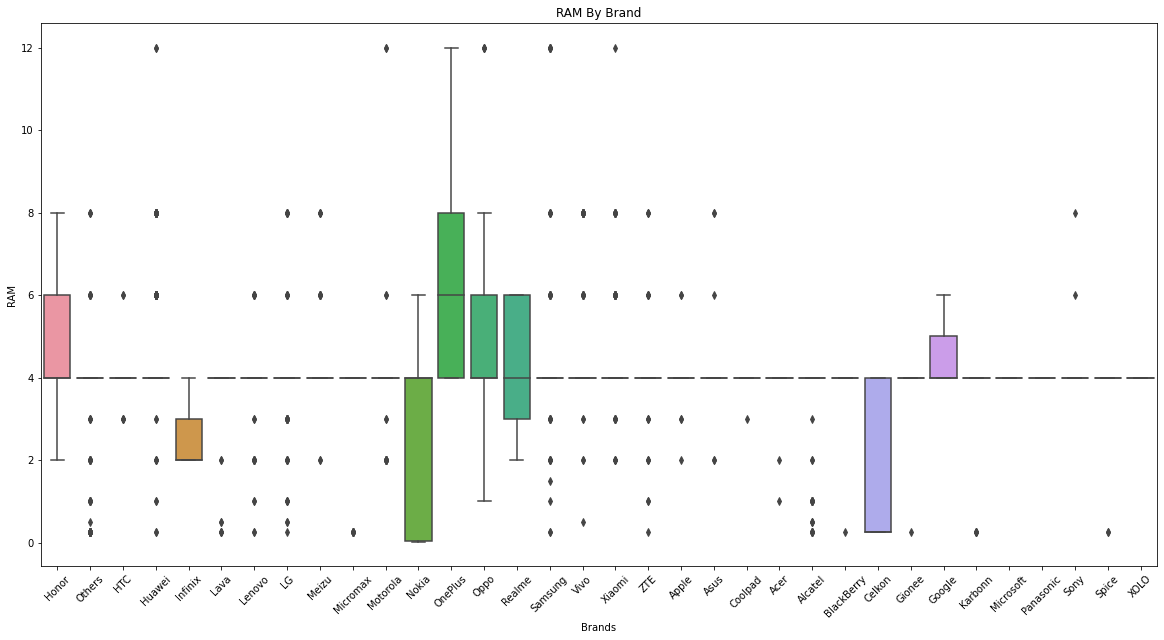

In [384]:
# set figure size
plt.figure(figsize = (20, 10))

# set plot title
plt.title('RAM By Brand')

# draw boxplot
sns.boxplot(data = df, x = 'brand_name', y = 'ram');

# rotate x labels 45 degrees
plt.xticks(rotation = 45);

# label axes
plt.xlabel('Brands');
plt.ylabel('RAM');

####Observations
* Most brands feature 4 GB of RAM. 
* There are a lot of outliers present on either side of 4 GB across many brands.
* Huawei, Motorola, OnePlus, Oppo, Samsung, and Xiaomi all have phones with 12 GB. 

###Q5: A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [385]:
# create data subset with battery greater than 4500 mAH
df_big_battery = df[df.battery > 4500]

df_big_battery.shape

(341, 15)

####Observations
* There are 341 refurbished phones with batteries larger than 4500 mAh.

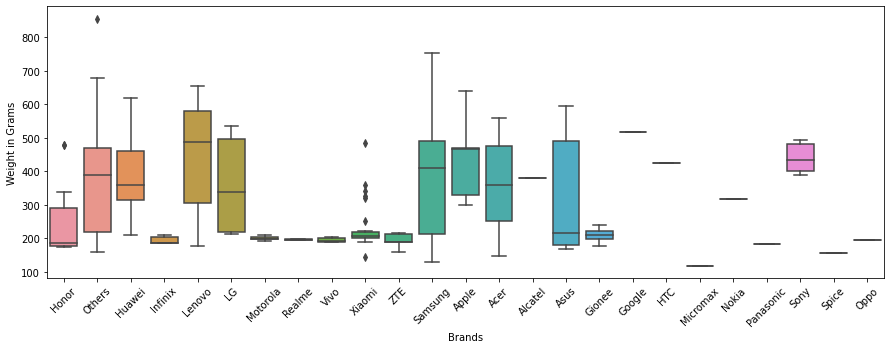

In [386]:
# set figure size
plt.figure(figsize = (15, 5))

# draw boxplot using big battery subset
sns.boxplot(data = df_big_battery, x = 'brand_name', y ='weight');

# rotate x labels 45 degrees
plt.xticks(rotation = 45);

# label axes
plt.xlabel('Brands');
plt.ylabel('Weight in Grams');

The linear correlation factor between batteries with a capacity greater than 4500 mAh and weight is: 0.76


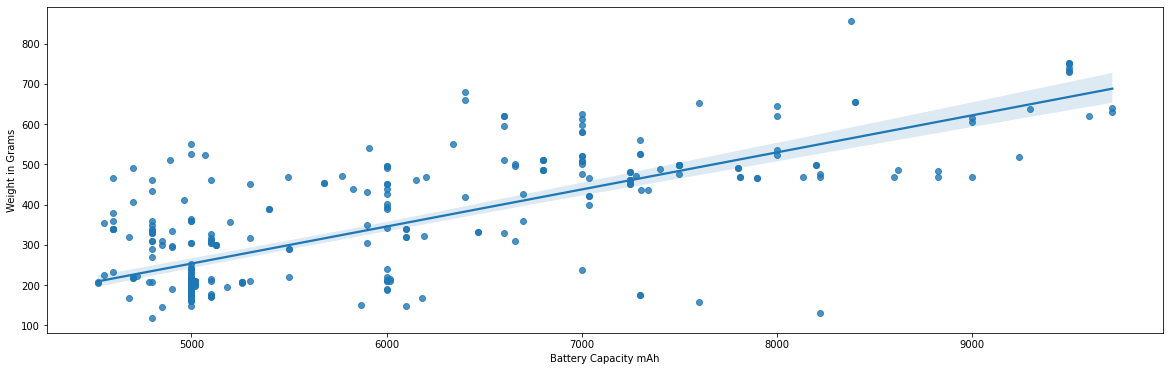

In [387]:
# correlation between batteries larger than 4500 mAh and weight

# set figure size
plt.figure(figsize = (20, 6))

# draw regplot with big battery subset
sns.regplot(x = 'battery', y = 'weight', data = df_big_battery);

# label axes
plt.ylabel('Weight in Grams');
plt.xlabel('Battery Capacity mAh');

print('The linear correlation factor between batteries with a capacity greater than 4500 mAh and weight is:' ,\
      round(df_big_battery.corr()['weight']['battery'] , 2)) # round to 2 decimal places

####Observations
* Confirming what was present in the heatmap, there is a strong correlation between battery size and weight. 

###Q6: Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [388]:
# create data subset with screen size greater than 6 inches
df_big_screen = df[df.screen_size > 6 * 2.54]

df_big_screen.shape

(1099, 15)

####Observations
* There are 1,099 used phones with screens larger than 6 inches.

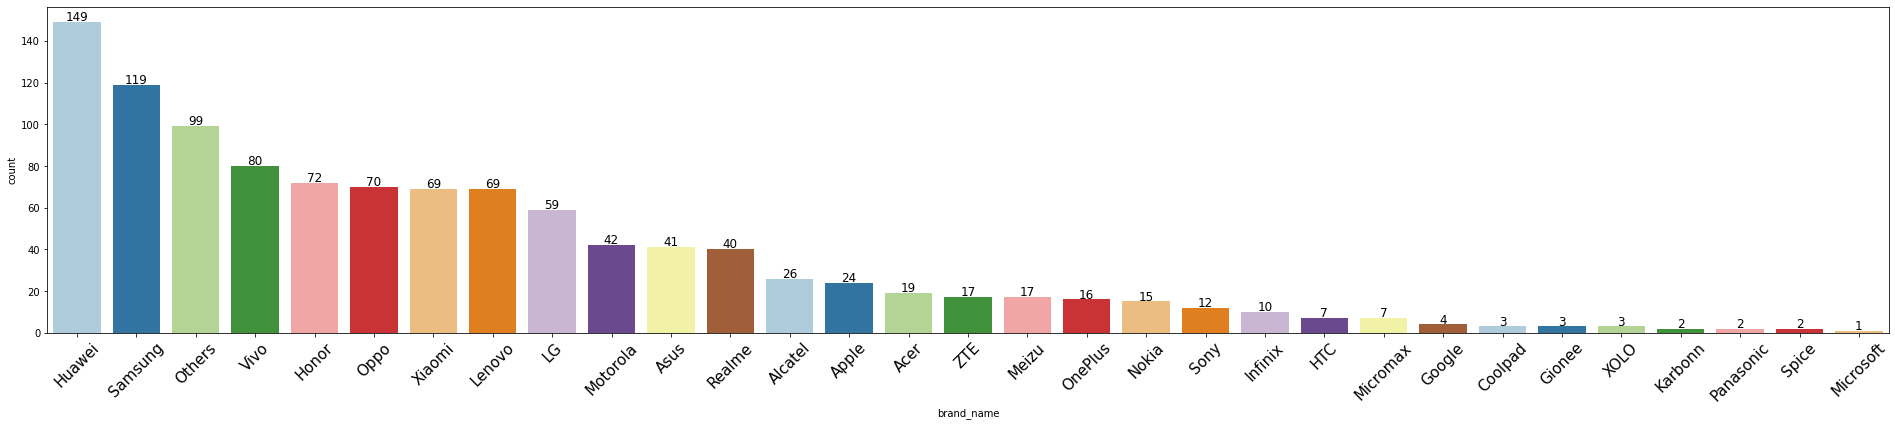

In [389]:
# draw labeled barplot with big screen subset 
labeled_barplot(df_big_screen, 'brand_name');

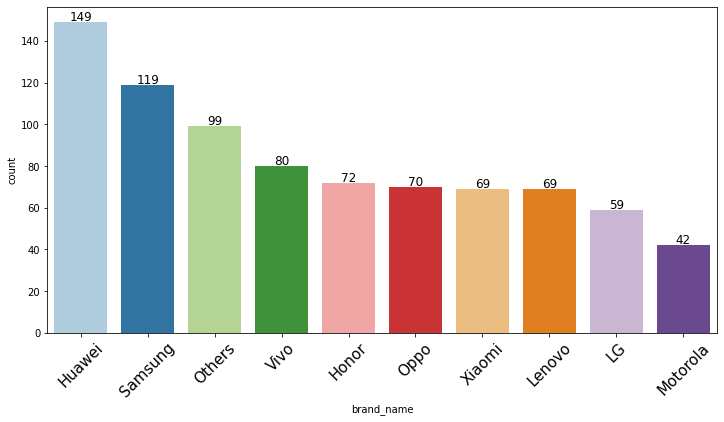

In [390]:
# draw labeled barplot with big screen subset restricted to top 10 brands
labeled_barplot(df_big_screen, 'brand_name', n = 10);

####Observations
* Huawei and Samsung have the most used phones with screens larger than 6 inches. 
* The third place other category represents a mix of brands with phones larger than 6 inches.

###Q7: A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [391]:
# create data subset with selfie cameras grreater than 8 MP
df_selfie_cam = df[df.selfie_camera_mp > 8]
df_selfie_cam.shape

(655, 15)

####Observations
* There are 655 refurbished phone with a selfie camera greater than 8 MP.

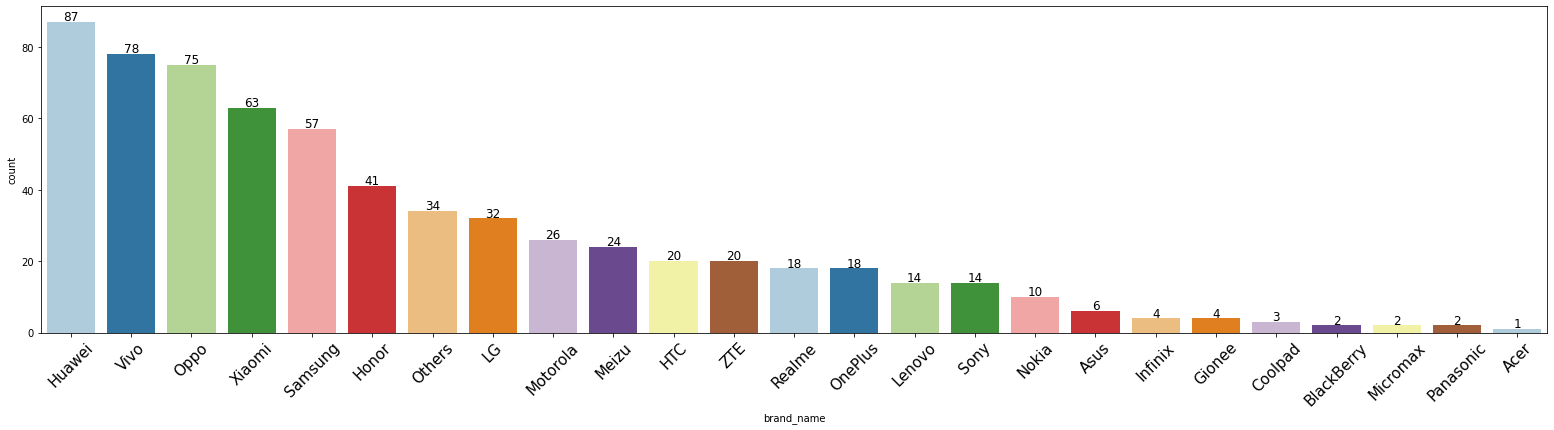

In [392]:
# draw labeled barplot with selfie cam subset 
labeled_barplot(df_selfie_cam, 'brand_name')

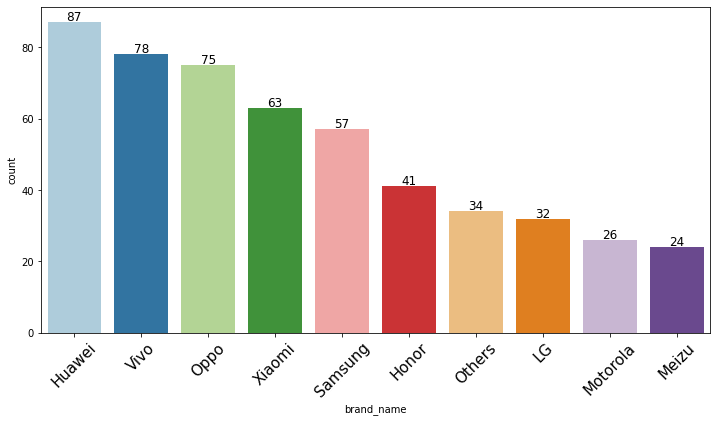

In [393]:
# draw labeled barplot with selfie cam subset restricted to top 10 brands
labeled_barplot(df_selfie_cam, 'brand_name', n = 10);

####Observations
* Huawei has the most used devices with selfie cameras greater than 8 MP at 87, while Vivo comes in second with 78 devices.

###Q8: 8. A lot of devices also offer great rear cameras. What is the distribution of devices offering greater than 16MP rear cameras across brands?

In [394]:
# create data subset with rear cameras greater than 16 MP
df_rear_cam = df[df.main_camera_mp > 16]
df_rear_cam.shape

(94, 15)

####Observations 
* There are 94 used devices with rear cameras greater than 16 MP.

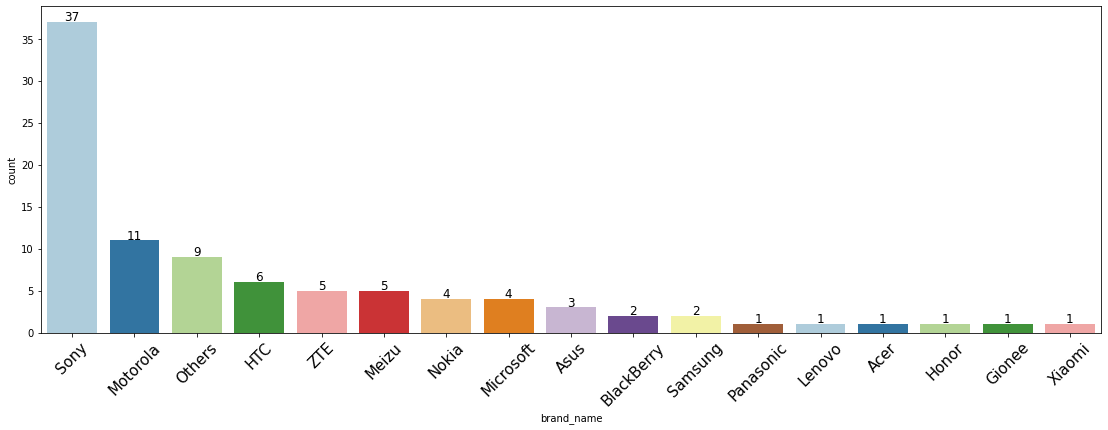

In [395]:
# draw labeled barplot with rear cam subset 
labeled_barplot(df_rear_cam, 'brand_name')

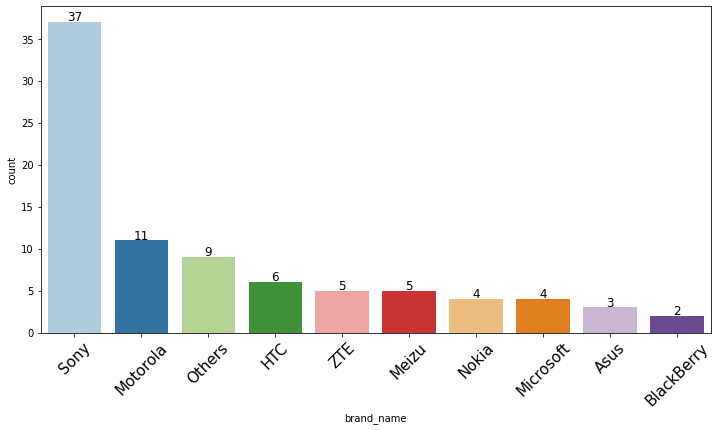

In [396]:
# draw labeled barplot with rear cam subset restricted to top 10 brands
labeled_barplot(df_rear_cam, 'brand_name', n = 10);

####Observations
* 37 Sony devices have rear cameras greater than 16 MP.
* The second largest brand, Motorola, offers 11 devices with large rear cameras.

###Q9: How has the price of used devices varied over the years?

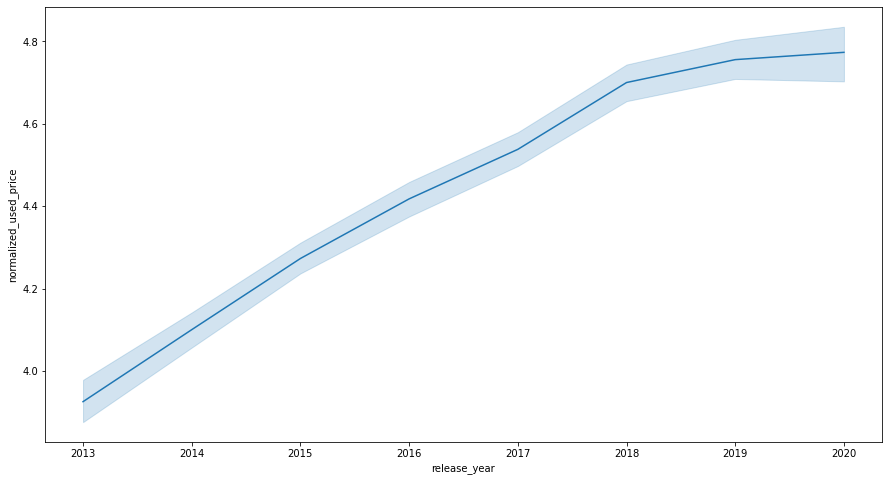

In [397]:
# set figure size
plt.figure(figsize = (15, 8))

# draw lineplot
sns.lineplot(data = df, x = 'release_year', y = 'normalized_used_price');


####Observations
* Used device prices have increased each year.

###Q 10: How does the price of used phones vary depending on network?

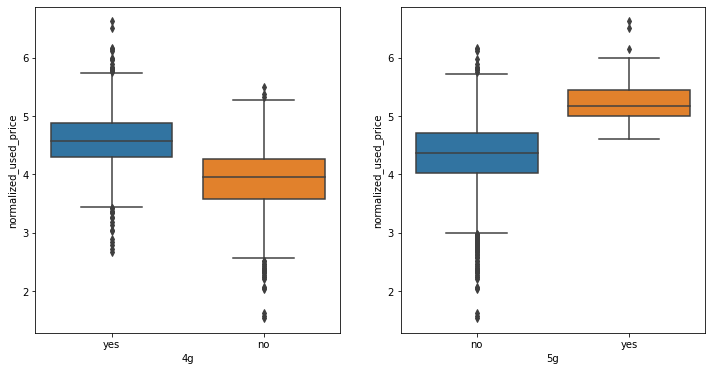

In [398]:
# set figure size
plt.figure(figsize = (12, 6))

# draw subplot
plt.subplot(121)
sns.boxplot(data = df, x = '4g', y = 'normalized_used_price');

# draw subplot
plt.subplot(122)
sns.boxplot(data = df, x = '5g', y = 'normalized_used_price');


####Observations
* Phones with 4g and 5g capabilities cost more.
* 5g-enabled devices cost more on average than 4g-enabled devices.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [399]:
# copy the data set
df1 = df.copy()

In [400]:
# check for missing values
df1.isnull().sum()


brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

####Observations
* There are missing values in several columns.
* I will impute the missing values with medians grouped by release_year and brand_name.

In [401]:
# define the columns to impute
impute_col = ['selfie_camera_mp','main_camera_mp', 'ram', 'int_memory', 'battery', 'weight']

# for columns listed in impute_col, impute missing values with median grouped by brand_name and release_year
for col in impute_col:
    df1[col] = df1[col].fillna(value = df1.groupby(['brand_name','release_year'])[col].transform("median"))   

# recheck for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

####Observations
* Ram and internal_memory no longer have missing values. 
* There are still missing values present.
* I will impute the missing values by column medians grouped by brand_name.


In [402]:
# define the columns to impute
impute_col = ['main_camera_mp', 'selfie_camera_mp', 'battery', 'weight',]

# for columns listed in impute_col, impute missing values with median grouped by brand_name
for col in impute_col: df1[col] = df1[col].fillna(value = df1.groupby(['brand_name'])[col].transform("median"))

# recheck for missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

####Observations
* All missing values have been filled except for main_camera_mp
* I will fill the missing values with the column median.

In [403]:
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(df1['main_camera_mp'].median()) 

# recheck for missing values
df1.isnull().sum()


brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

####Observations
* All missing values have been filled.

###Feature Engineering


Since release_year is a categorical variable, I will transform the data into a new numerical column, years_since_release and drop the release_year column. 2021, the year the data was collected, will be the baseline.

In [404]:
# create years_since_column by subtracting the release year from the baseline, 2021
df1['years_since_release'] = 2021 - df1['release_year']

# drop the release_year column
df1.drop('release_year', axis = 1, inplace = True)

# get statistical summary of new column
df1['years_since_release'].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

####Observations
* The average age of used devices in the data set is 5.03 years. 
* The oldest used devices are 8 years old while the newest are 1 year old.

###Outlier Detection


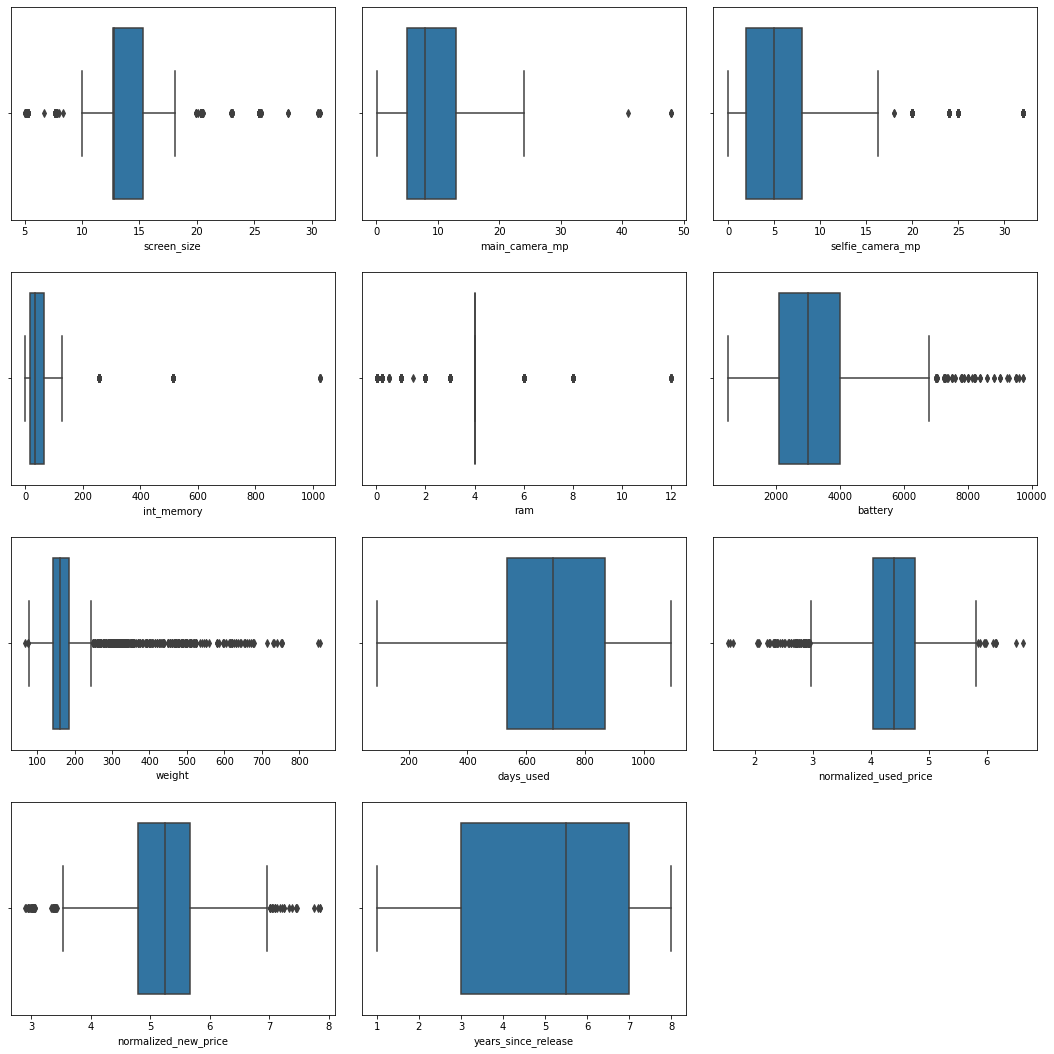

In [405]:
# boxplots of numeric columns for outlier detection
numeric_cols = df1.select_dtypes(include = np.number).columns.tolist()

# set figure size
plt.figure(figsize = (15, 15))

# outlier detection using boxplot
for i, variable in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data = df1, x = variable)
    plt.tight_layout(pad = 2);

####Observations
* There are outliers present in the data set.
* I will not treat the outliers to preseve the information and proper values.

###Data Preparation for Modeling

* The goal is to predict normalized price. 
* First, I must encode categorical variables. 
* I will split the data into train and test sets to evaluate the model. Then I will create a linear regression model using the train data sets and evaulate its performance.

In [406]:
# define dependent and independent variables
X = df1.drop(['normalized_used_price'], axis = 1)
y = df1['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [407]:
# add the intercept
X = sm.add_constant(X)

In [408]:
# create dummy variables
X = pd.get_dummies(X, columns = X.select_dtypes(include=['object', 'category']).columns.tolist(),
    drop_first = True) 

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [409]:
# split data using 70:30 ratio for train to test data (70:30 is most common split ratio, 70% knowledge goes to training set and 30% knowledge goes to test set)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [410]:
# check the number of rows in each set
print('The number of rows in the train data set = ', x_train.shape[0])
print('The number of rows in the test data set = ', x_test.shape[0])

The number of rows in the train data set =  2417
The number of rows in the test data set =  1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

####Normalized Used Price

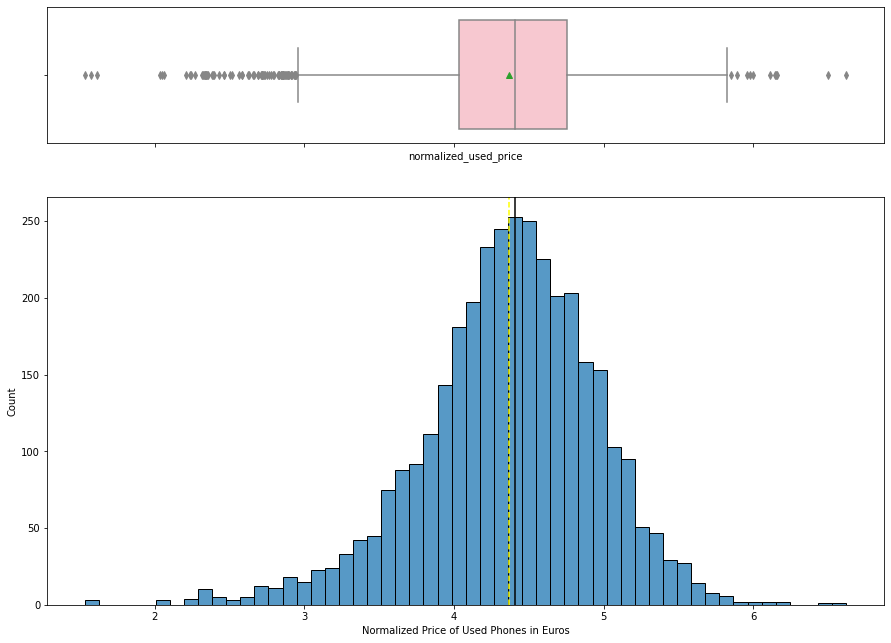

In [411]:
# draw combined histogram and boxplot using previously defined function
histogram_boxplot(df1, 'normalized_used_price')

# label x axis
plt.xlabel('Normalized Price of Used Phones in Euros');

####Observations
* Normalized used price is approximately normally distributed.
* There are outliers on boths sides of the normalized used price data set.

####Normalized New Price

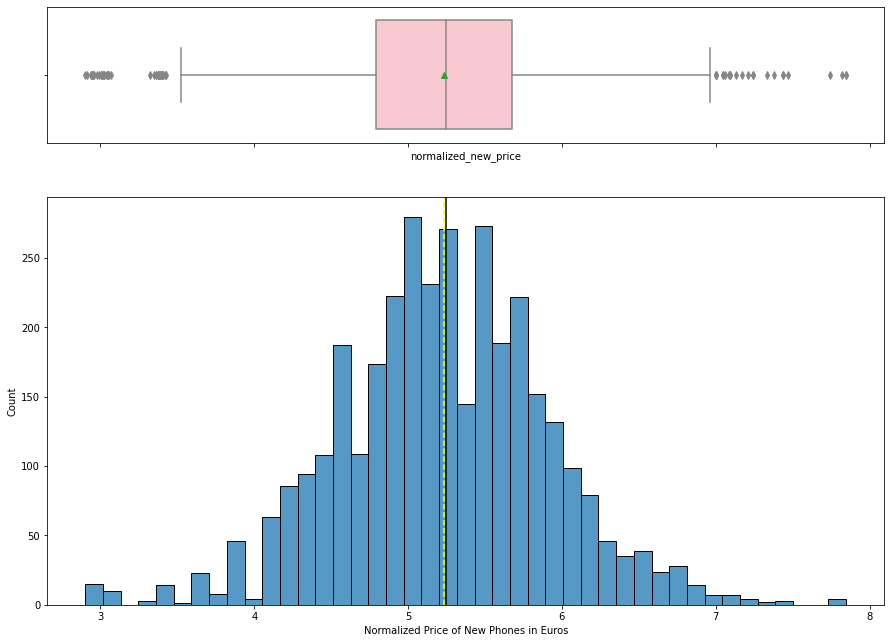

In [424]:
# draw combined histogram and boxplot
histogram_boxplot(df1, 'normalized_new_price')

# label x axis
plt.xlabel('Normalized Price of New Phones in Euros');

####Observations
* Normalized new price is approximately normally distributed with outliers on both sides of the data set.

####Screen Size

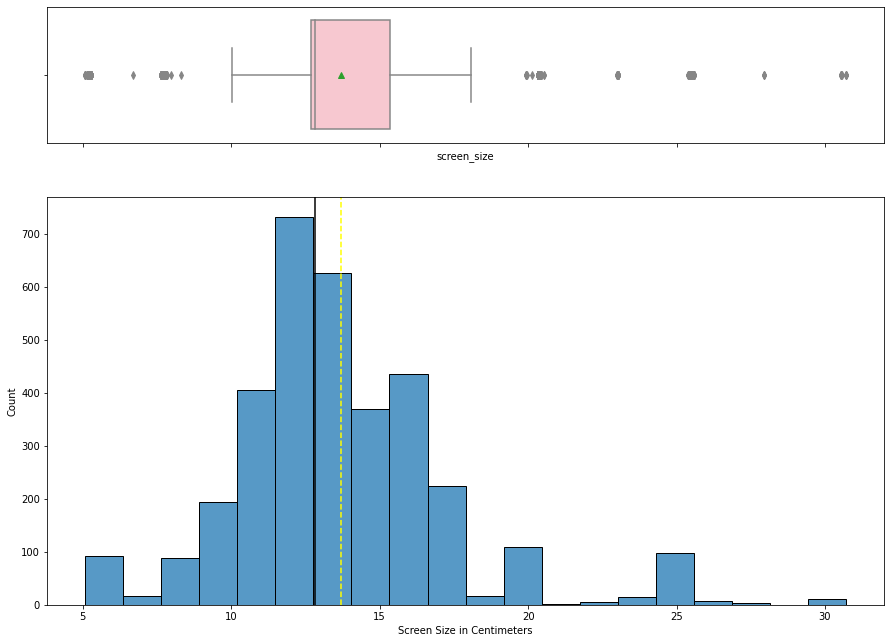

In [413]:
# draw combined histogram and boxplot
histogram_boxplot(df1, 'screen_size', bins = 20)

# label x axis
plt.xlabel('Screen Size in Centimeters');

####Observations 
* Screen size shows a slightly right-skewed distribution with outliers present on both sides.

#### Main Camera MP

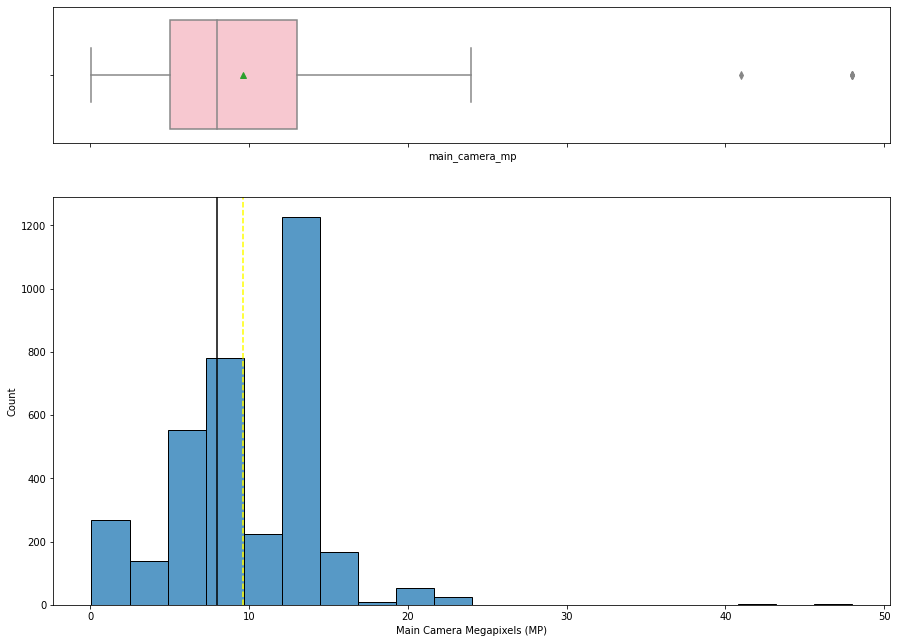

In [414]:
# draw combined histogram and boxplot
histogram_boxplot(df1, 'main_camera_mp', bins = 20)

# label x axis
plt.xlabel('Main Camera Megapixels (MP)');

####Observations
* Main Camera MP has a right-skewed distribution with outliers present on one side.

####Selfie Camera MP

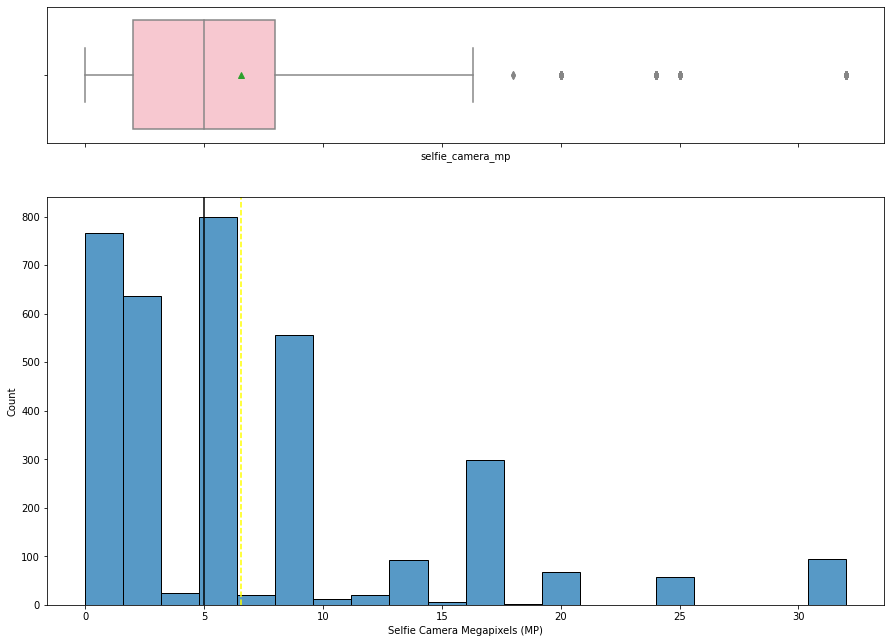

In [415]:
# draw combined histogram and boxplot
histogram_boxplot(df1, 'selfie_camera_mp', bins = 20)

# label x axis
plt.xlabel('Selfie Camera Megapixels (MP)');

####Observations
* Selfie camera has a right-skewed distribution with outliers on one side.

####RAM

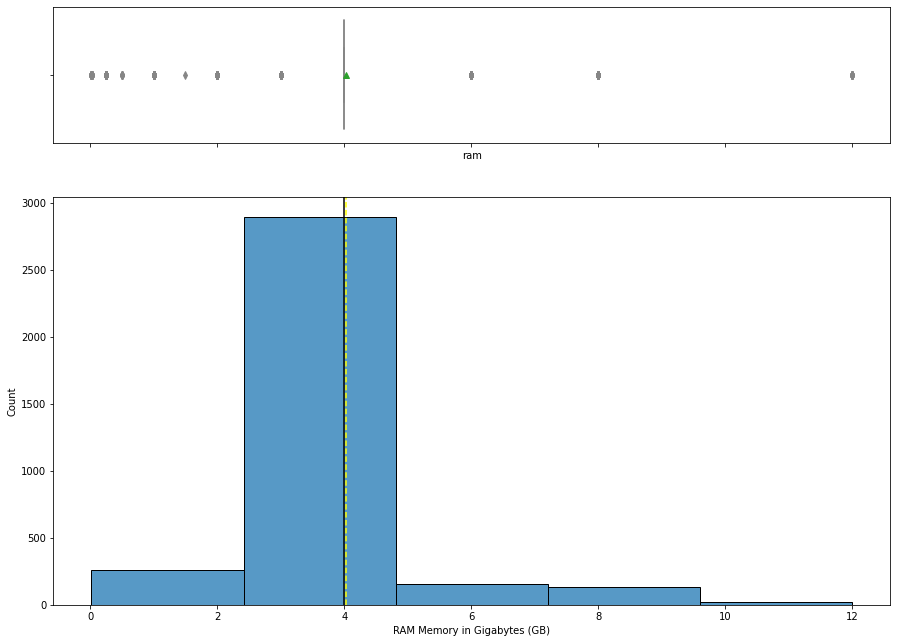

In [416]:
# draw combined histogram and boxplot
histogram_boxplot(df1,'ram', bins = 5)

# label x axis
plt.xlabel('RAM Memory in Gigabytes (GB)');

####Observations 
* RAM has an approximately normal to slightly right-skewed distribution with outliers on both sides.

####Internal Memory

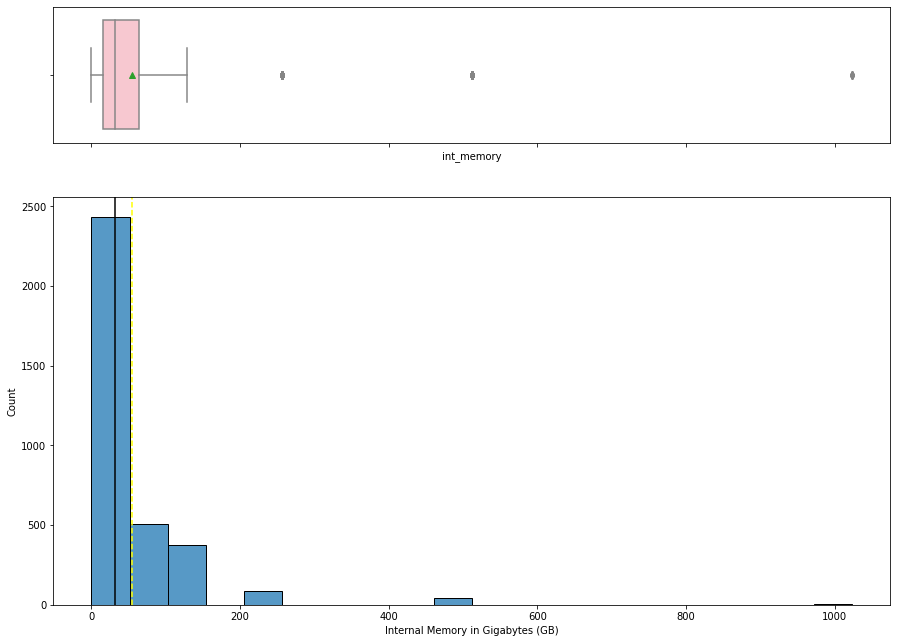

In [417]:
# draw combined histogram and boxplot
histogram_boxplot(df1, 'int_memory', bins = 20)

# label x axis
plt.xlabel('Internal Memory in Gigabytes (GB)');

####Observations
* Internal memory has a right-skewed distribution with outliers on one side.

####Weight

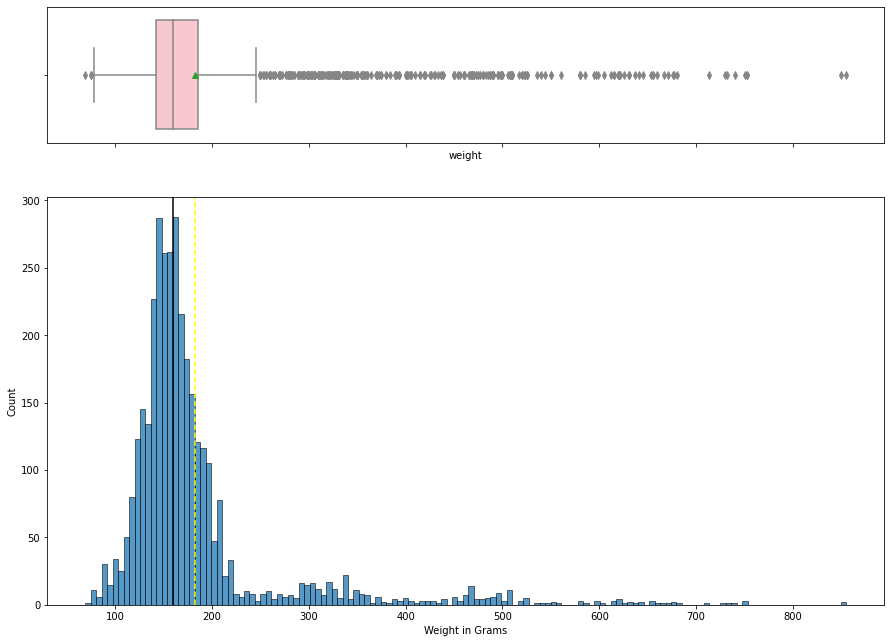

In [418]:
# draw combined histogram and boxplot
histogram_boxplot(df1, 'weight')

# label x axis
plt.xlabel('Weight in Grams');

####Observations
* Weight has a right-skewed distribution with outliers on both sides.

####Battery

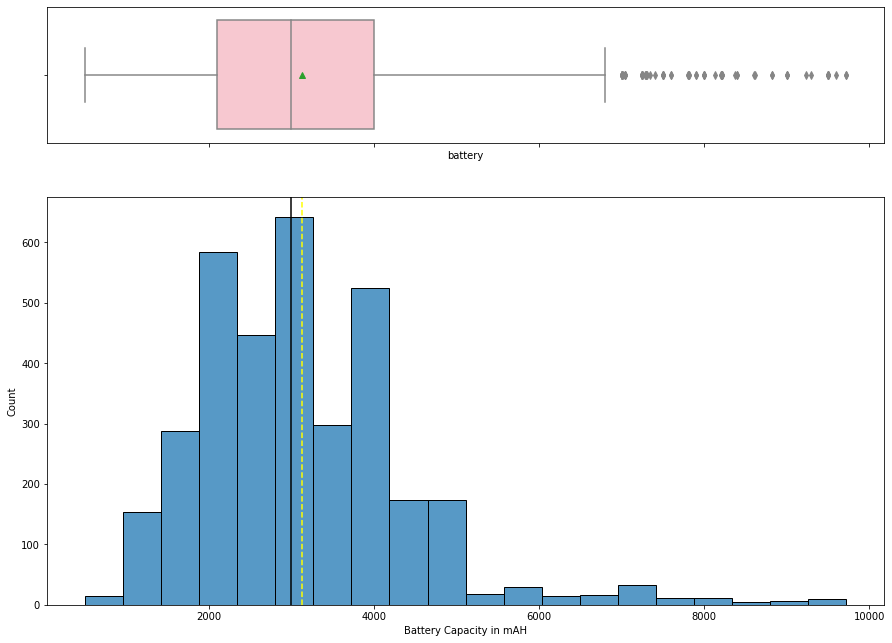

In [419]:
# draw combined histogram and boxplot
histogram_boxplot(df1, 'battery', bins = 20)

# label x axis
plt.xlabel('Battery Capacity in mAH');

####Observations
* Battery has a right-skewed distribution with outliers on one side.

####Days Used

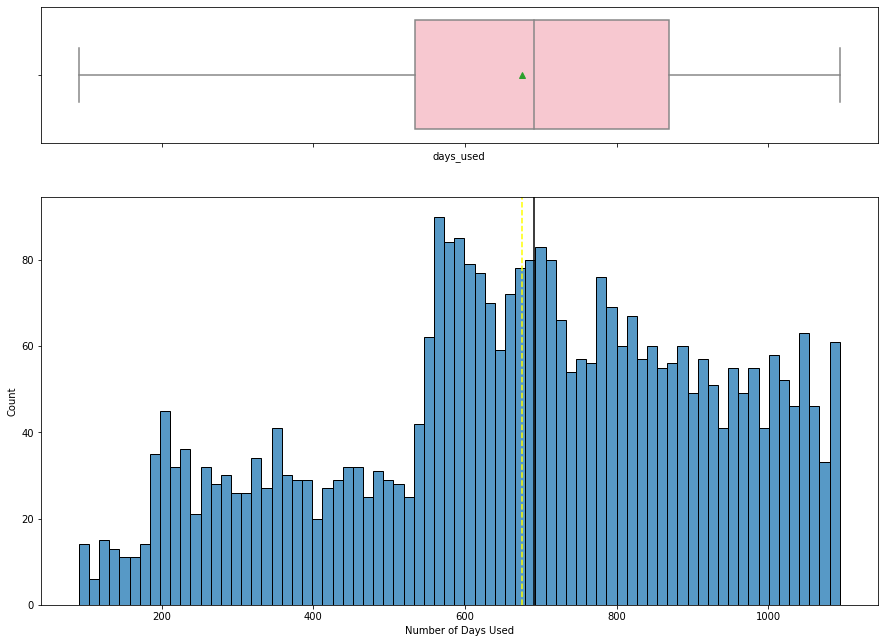

In [420]:
# draw combined histograma and boxplot
histogram_boxplot(df1, 'days_used', bins = 75)

# label x axis
plt.xlabel('Number of Days Used');

####Observations
* Days used has a moderately left-skewed distribution with no outliers.

## Model Building - Linear Regression

In [421]:
# fitting the linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                           18:39:52   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


####Observations 
* The adjusted R-squared value is 0.842 while the R-squared value is 0.845, signifying there are no insignificant variables present in the model. The closer the adjusted R value is to 1, the better the model's fit. 0.845 signifies a good fit.
* The constant coefficient is the Y-intercept, 1.3156. If all predictor variables are zero, expected output should be equal to 1.3156.

## Model Performance Check

In [439]:
# define function to output adjusted R-squared
def adj_r2(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# define function to check performance of regression model (target = dependent, predictors = independent)
def model_performance(model, predictors, target):

    # predicting with independent variables
    pred = model.predict(predictors)

    # compute R-squared
    r2 = r2_score(target, pred)  
    
    # compute adjusted R-squared
    adjr2 = adj_r2(predictors, target, pred)  
    
    # compute RMSE
    rmse = np.sqrt(mean_squared_error(target, pred))  
    
    # compute MAE
    mae = mean_absolute_error(target, pred)  

    # compute MAPE
    mape = mape_score(target, pred)  

    # create new data frame with the metrics
    df_perf = pd.DataFrame(
        {
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2,
            'Adj. R-squared': adjr2,
            'MAPE': mape,
        },
        index=[0],
    )

    return df_perf

In [444]:
# check model performance on train set

# add title label
print('Performance of Train Set\n')
olsmodel_train_perf = model_performance(olsmodel, x_train, y_train)
olsmodel_train_perf


Performance of Train Set



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


####Observations
* The train set R-squared is 0.845, so the model is not underfitting.



In [441]:
# check model performance on test set

# add title label
print('Performance of Test Set\n')
olsmodel_test_perf = model_performance(olsmodel, x_test, y_test)
olsmodel_test_perf

Performance of Test Set



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


####Observations
* The train and test root mean square error and mean absolute error are close in values, signifying the model is not overfitting.

* The MAE suggests that the model can predict the price of a used device within a mean error of 0.18 on the test data.
* MAPE of 4.5 on the test data means we are able to preduct within 4.5% of the used device price.

## Checking Linear Regression Assumptions

- Ensure that the assumptions of linear regression are satisfied.

1. No multicolinearity
2. Linearity of variables
3. Independence of error terms
4. Normality of error terms
5. No heterodasticity

###Q1: Check for multicolinearity using VIF

In [445]:
# import required function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# define function to check VIF
def vif_check(predictors):
    vif = pd.DataFrame()
    vif['feature'] = predictors.columns

    # calculate VIF for each feature
    vif['VIF'] = [variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))]
        
    return vif

In [446]:
vif_check(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


####Observations
* There are multiple columns with high VIF values, indicating the presence of strong multicollinearity
* I will drop numerical columns with a VIF greater than 5 systematically, weight and screen size. 
* I will ignore VIF values for dummy variables and the intercept constant.


###Remove Multicolinearity

In [459]:
# define a function to treat multicolinearity ( target = dependent, predictors = independent)
def treat_multicol(predictors, target, high_vif_columns):

    # create empty lists to store adjusted R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # drop one high VIF column at a time and store adjusted R-squared and RMSE values in list
    for cols in high_vif_columns:

        # define new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create model
        olsmodel = sm.OLS(target, train).fit()

        # add adj. R-squared and RMSE to lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # create new dataframe for results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [461]:
col_list = ['screen_size', 'weight']

res = treat_multicol(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [462]:
# drop weight column and define new train and test sets
col_to_drop = 'weight'
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# recheck VIF with previously defined function
vif = vif_check(x_train2)

# add label title
print('VIF After Dropping Column', col_to_drop)
vif

VIF After Dropping Column weight


,feature,VIF
0,const,208.983030
1,screen_size,3.593184
2,main_camera_mp,2.188817
3,selfie_camera_mp,2.787946
4,int_memory,1.364018
5,ram,2.280390
6,battery,3.681135
7,days_used,2.648280
8,normalized_new_price,3.116297
9,years_since_release,4.726722


####Observations 
* Dropping weight column decreased the VIF of screen_size less than 5
* Multicolinearity assumption is satisfied


###Q2: Rebuild the model using the updated set of predictor variables

In [463]:
# rebuild model with updated train set
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.0
Date:                   Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                           19:20:55   Log-Likelihood:                 95.629
No. Observations:                   2417   AIC:                            -95.26
Df Residuals:                       2369   BIC:                             182.7
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


####Observations
* The new adjusted R-squared value is 0.838, signifying the dropped column did not have a drastic effect on the model.
* Since there is no multicolinearity, we can look at the p-values of predictor variable to check significance. 

###Q3: Drop High P-Value

* I will systematically drop predictor variables with p-values greater than 0.05, one-by-one.

In [464]:
# create list of columns from adjusted test set
cols = x_train2.columns.tolist()

# set max p-value
max_p_value = 1

while len(cols) > 0:
    
    # define train set
    x_train_aux = x_train2[cols]

    # fit the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # get p-values and max p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols

print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes']


In [465]:
# define new train and sets with selected features
x_train3 = x_train2[['const'] + selected_features]
x_test3 = x_test2[['const'] + selected_features]

In [466]:
# print adjusted model summary
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                           19:22:22   Log-Likelihood:                 81.071
No. Observations:                   2417   AIC:                            -138.1
Df Residuals:                       2405   BIC:                            -68.66
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [468]:
# check model performance on train set (70% data)
print('Performance of Train Set\n')
olsmod2_train_perf = model_performance(olsmod2, x_train3, y_train)
olsmod2_train_perf

Performance of Train Set



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233989,0.183177,0.839296,0.838427,4.392265


In [469]:
# check model performance on test set (30% data)
print('Performance of Test Set\n')
olsmod2_test_perf = model_performance(olsmod2, x_test3, y_test)
olsmod2_test_perf

Performance of Test Set



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238554,0.185,0.84222,0.840215,4.500963


####Observations
* No features have a p-value greater than 0.05.
* x_train3 will be used as predictor variable and olsmod2 is the final model.
* Adjusted R-squared is 0.839, and the model explains approximately 84% of the variance.
* The adjusted R-squared from olsmod1 was 0.838. The dropped variables were not affecting the model. 
* RMSE and MAE are approximately even, indicating the model is not overfitting.

###Q4: Test for Linearity and Independence

* I will plot fitted values vs. residuals to check for linearity and independence patterns 


In [470]:
# define new data frame with actual, fitted, and residual values
df_pred = pd.DataFrame()

# use final model osmod2
df_pred['Actual Values'] = y_train  
df_pred['Fitted Values'] = olsmod2.fittedvalues
df_pred['Residuals'] = olsmod2.resid

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.858599,0.228888
1525,4.448399,4.613833,-0.165434
1128,4.315353,4.277568,0.037785
3003,4.282068,4.252225,0.029844
2907,4.456438,4.440283,0.016156


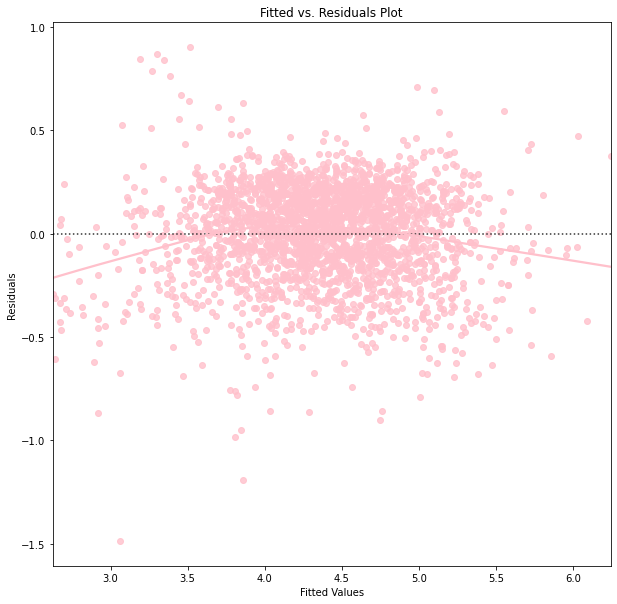

In [472]:
# set figure size 
plt.figure(figsize = (10, 10))

# draw plot of fitted values vs residuals
sns.residplot(data = df_pred, x = 'Fitted Values', y = 'Residuals', color = 'pink', lowess = True);

# label axises and plot title
plt.xlabel('Fitted Values');
plt.ylabel('Residuals');
plt.title('Fitted vs. Residuals Plot');

####Observations
* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).
* There is no pattern in the plot, so the assumptions of linearity and independence are satisfied.

###Q5: Test for Normality

* I will use the Shapiro-Wilkes test to check normality. 
* Null hypothesis: Residuals are normally distributed
* Alternate hypothesis: Residuals are not normally distributed

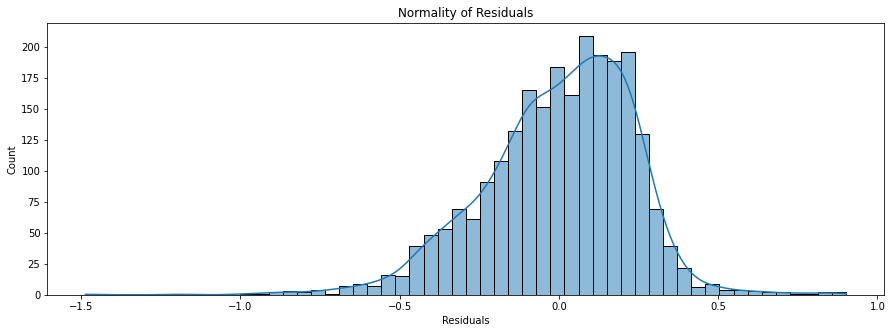

In [473]:
# set figure size
plt.figure(figsize = (15, 5))

# draw histogram of residuals 
sns.histplot(data = df_pred, x = 'Residuals', kde = True);

# set title
plt.title('Normality of Residuals');


####Observations
* The histogram shows a bell shape, so I will continue with a Q-Q plot.

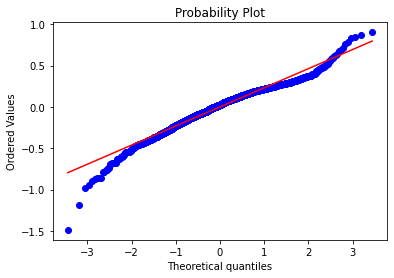

In [474]:
# import necessary libraries
import pylab
import scipy.stats as stats

# draw probability plot
stats.probplot(df_pred['Residuals'], dist = 'norm', plot = pylab);

####Observations
* The residuals approximately follow a straight line aside from the tails. 
* I will continue with a Shapiro-Wilkes test. 

In [475]:
# run Shapiro Wilkes test
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=0.9724023342132568, pvalue=3.463951697107566e-21)

####Observations
* P-value is less than 0.05.
* We accept this distribution as normal, so the assumption is satisfied.


###Q6: Test for Homoscedasticity

* I will test for homoscedasticity by using the goldfeldquandt test.

In [476]:
# import necessary libraries
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(df_pred['Residuals'], x_train3)
lzip(name, test)

[('F statistic', 1.0554902509992028), ('p-value', 0.17520491832996798)]

####Observations
* The p-value is greater than 0.05, so we can say that the residuals are homoscedastic and the assumption is satisfied.

###Q7: Predictions on Test Data


In [477]:
# predictions on test set using final model olsmod2
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.370046
2341,3.696103,3.954403
1913,3.592093,3.760742
688,4.306495,4.099280
650,4.522115,5.117977
2291,4.259294,4.392088
40,4.997685,5.404365
1884,3.875359,4.103732
2538,4.206631,4.044604
45,5.380450,5.301336


####Observations 
* The model has returned fairly equal prediction results.

## Final Model

In [478]:
# create final train and test set copies
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [479]:
# output final model
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                           19:39:42   Log-Likelihood:                 81.071
No. Observations:                   2417   AIC:                            -138.1
Df Residuals:                       2405   BIC:                            -68.66
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [480]:
# check model performance on train set (70% data)
print('Performance of Train Set\n')
olsmodel_final_train_perf = model_performance(olsmodel_final, x_train_final, y_train)

olsmodel_final_train_perf

Performance of Train Set



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233989,0.183177,0.839296,0.838427,4.392265


In [481]:
# check model performance on test set (30% data)
print('Performance of Test Set\n')
olsmodel_final_test_perf = model_performance(olsmodel_final, x_test_final, y_test)

olsmodel_final_test_perf

Performance of Test Set



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238554,0.185,0.84222,0.840215,4.500963


####Observations
* The model explains approximately 84% of the variation in the data, which is very good.
* The train and test RMSE and MAE are low and almost equal, so our model is not overfitting.
* The MAPE on the test set suggests we can predict within 4.5% the used devices prices.
* The model olsmodel_final is good for prediction and inference.

## Actionable Insights and Recommendations 

####Insights
* The model explains approximately 84% of the variation in the data set and can predict within 4.5% the used price of a refurbished device. 
* normalized_used_price and normalized_new_price show a high positive correlation. Refurbished devices identical to new devices will reflect proportional prices. 
* If the screen size of a device increases by 1 unit, the used device price increases by 0.0433. (assumes all other variables held constant)
* If the main camera mega pixels increases by 1 unit, the used device price increases by 0.0189 units. (assumes all other variables held constant)
* If the selie camera mega pixels increases by 1 unit, the used device price increases by 0.0131 units. (assumes all other variables held constant)
* If the RAM increases by 1 unit, the used device price increases by 0.0172 units. (assumes all other variables held constant)
* If the new price of a device increases by 1 unit, the used device price increases by 0.4282 units. (assumes all other variables held constant)
* For every 1 year a device ages, used device price decrease by 0.0181 units. (assumes all other variables held constant)
* screen_size, main_camera_mp, selfie_camera_mp, ram, normalized_new_price, and 4g have positive coefficients. As each variable increases, the price of refurbished devices also increases.

#### Recommendations
* Screen size and the price of new devices have the largest influence on the price of refurbished phones. As brands design new phones for the market, they can consider increasing overall screen size to positively affect both new and used device prices. 
* As years owned negatively affects the price of used devices, cell phone brands can shorten the time between new phone model releases to encourage device trade-in while used device prices are still reasonably high. Brands could offer a used device trade-in program to customers.
* Brands should consider increasing main camera and selfie camera mega pixels, ram, and 4G and 5G capabilities to raise the price of their new and used devices. They could tailor marketing strategies to each unique identifier. 
* The number of used devices decreases each year due to a slow down of technological advancements and a market saturation where phones are lasting longer thanks to better technology. Again, brands can offer a trande-in incentive to spur the used device market and brand revenue. 


In [482]:
# code to convert Jupyter notebook in Google Colab to html format for submission
%%shell
jupyter nbconvert --to html ///content/ReCell_Kimberly_Magerl.ipynb

[NbConvertApp] Converting notebook ///content/ReCell_Kimberly_Magerl.ipynb to html
[NbConvertApp] Writing 2121928 bytes to /content/ReCell_Kimberly_Magerl.html
